# Differential enhancer activity and differential gene expression correlation

In [1]:
import os
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import seaborn as sns

In [2]:
abc_activity_file = "/data5/deepro/starrseq/papers/results/6_link_da_enhancers_to_de_genes/data/activity_vs_expression_corr/abc_da_de_table.csv"
nearest_activity_file = "/data5/deepro/starrseq/papers/results/6_link_da_enhancers_to_de_genes/data/activity_vs_expression_corr/nearest_da_de_table.csv"

In [3]:
libraries = ["CC", "ATF2", "CTCF", "FOXA1", "LEF1", "SCRT1", "TCF7L2", "16P12_1"]

In [4]:
def create_activity_expression_df(activity_file, libraries, act_column_suff, exp_column_suff):
    activity_df = pd.read_csv(activity_file)

    act = activity_df.melt(id_vars=["chrom_coord", "gene_id", "gene_name"], value_vars=["_".join([v for v in (lib, act_column_suff, "act") if v]) for lib in libraries], var_name="library", value_name="activity")
    act["library"] = act.library.str.replace("_act", "")
    exp = activity_df.melt(id_vars=["chrom_coord", "gene_id", "gene_name"], value_vars=["_".join([v for v in (lib, exp_column_suff, "exp") if v]) for lib in libraries], var_name="library", value_name="expression")
    exp["library"] = exp.library.str.replace("_exp", "")


    df = act.merge(exp, left_on=["chrom_coord", "gene_id", "gene_name", "library"], right_on=["chrom_coord", "gene_id", "gene_name", "library"])
    return df

In [5]:
abc_df = create_activity_expression_df(abc_activity_file, libraries[1:], "log2FoldChange", "log2FoldChange")

In [6]:
nearest_df = create_activity_expression_df(nearest_activity_file, libraries[1:], "log2FoldChange", "log2FoldChange")

/tmp/ipykernel_4043819/1653555783.py:1: DtypeWarning: Columns (39) have mixed types.Specify dtype option on import or set low_memory=False.
  nearest_df = create_activity_expression_df(nearest_activity_file, libraries[1:], "log2FoldChange", "log2FoldChange")


0.148010810221467


<AxesSubplot:xlabel='activity', ylabel='expression'>

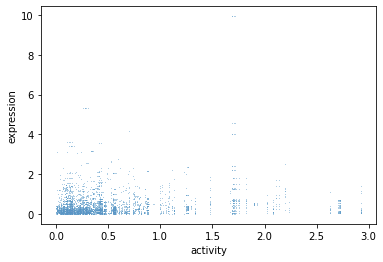

In [7]:
print(abc_df.activity.abs().corr(abc_df.expression.abs()))
sns.scatterplot(x=abc_df.activity.abs(), y=abc_df.expression.abs(), s=1, alpha=0.5)

0.08828749226722794


<AxesSubplot:xlabel='activity', ylabel='expression'>

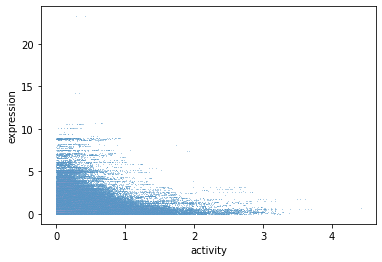

In [8]:
print(nearest_df.activity.abs().corr(nearest_df.expression.abs()))
sns.scatterplot(x=nearest_df.activity.abs(), y=nearest_df.expression.abs(), s=1, alpha=0.5)